In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the Data file and display the key statistics per feature
df = pd.read_csv("abalone.csv")
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3]:
#Lets do some data exploration

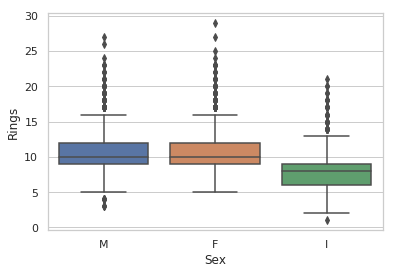

In [4]:
#Display a box plot for the three different genders
sns.set(style="whitegrid")

ax=sns.boxplot(x="Sex", y="Rings", data=df)

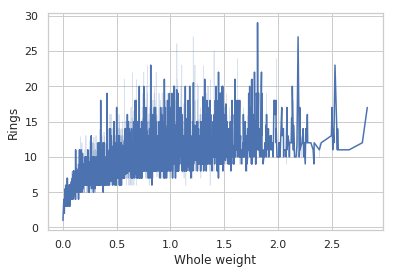

In [5]:
#Display a Line graph for Total weight against the rings
sns.lineplot(x="Whole weight", y="Rings", data=df)

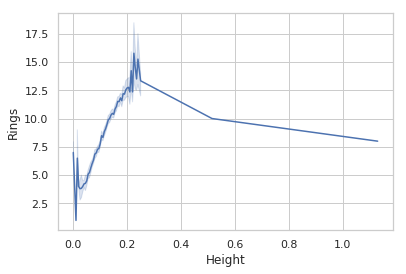

In [6]:
#Display a Line graph for height against the rings
sns.lineplot(x="Height", y="Rings", data=df)

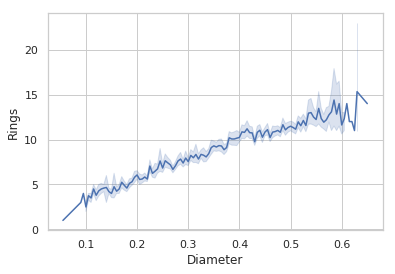

In [7]:
#Display a Line graph for Diameter against the rings
sns.lineplot(x="Diameter", y="Rings", data=df)

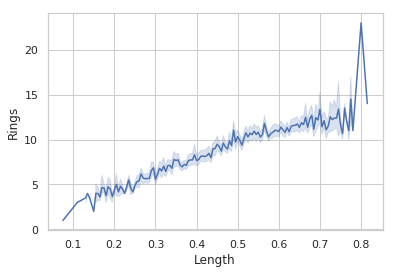

In [8]:
#Display a Line graph for Length against the rings
sns.lineplot(x="Length", y="Rings", data=df)

In [9]:
#One hot encoding for Sex feature
onehot_sex = pd.get_dummies(df['Sex'])
df=df.drop('Sex', axis =1)
df = df.join(onehot_sex)

#Display the feature correlations
corr = df.corr()
print(corr)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   
F               0.309666  0.318626  0.298421      0.299741        0.263991   
I              -0.551465 -0.564315 -0.518552     -0.557592       -0.521842   
M               0.236543  0.240376  0.215459      0.252038        0.251793   

                Viscera weight  Shell weight     Rings         

In [10]:
#Drop rows with null valunes
df.dropna()

#Prepare the X, Y variables
y=df['Rings']
df = df.drop('Rings', axis=1)
X=df.values

In [11]:
#Identify the principal components from the X features, the X features are highly correlated
pca = PCA(svd_solver='full')
X = pca.fit_transform(X)

#Display the variance ratio, 
#this provides an estimate of how much each principal component contributes to the X features
pca.explained_variance_ratio_

array([5.12471248e-01, 3.35030158e-01, 1.43756611e-01, 3.79858745e-03,
       2.86319439e-03, 1.03267511e-03, 4.81121361e-04, 4.21392182e-04,
       1.45012637e-04, 2.94640058e-32])

In [12]:
#Split the data into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Lets use the SVR with the polynomial 10th degree kernel 
tree_reg = SVR(kernel="poly", degree=10, coef0=1, C=10)
tree_reg.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=1, degree=10, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
#Prepare the y_test array
y_test = np.asarray(y_test)

#Predict the based test values
y_pred = tree_reg.predict(X_test)

In [14]:
#Calculate r squared

r2 = r2_score(y_test, y_pred)
print(r2)

0.5505772739836505


In [15]:
#Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
print(mse)

4.388485241924356


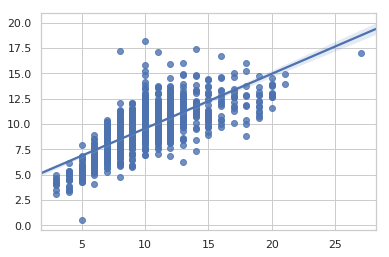

In [16]:
#Plot the regression chart

ax = sns.regplot(x=y_test, y=y_pred)